 # Project: Investigate Datasets From GapMinder Data! - Mohamed Helmy

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

<div class="alert alert-block alert-info">
By exploring the multiple datasets available on GapMinder, a big question came to my mind:<br>
    
<b> Is there a correlation between the level of economic growth and the level of happiness that people feel? 
</b> </div>

<div class="alert alert-block alert-warning">
In order to tackle this question, we need two main datasets from GapMinder to work with. Here are the datasets that we will need, plus a brief description about them:<br>
    
<b>1)	Income per person (GDP/capita, PPP (USD) inflation-adjusted)</b>
    
Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP). <br><br>

<b>2)	Happiness score (WHR)</b>

This is the national average response to the question of life evaluations asking the following “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?” This measure is also referred to as Cantril life ladder. Gapminder has converted this indicator's scale from 0 to 100 to easly communicate it in terms of percentage.
    

</div>

><b>Please note that all datasets were downloaded as .csv files</b>



In [1]:
# First, Let's import the essential packages that we will work with...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
print('All Packages Imported Successfully!')

# The print statement is just to make sure that importing went well!


All Packages Imported Successfully!


<a id='wrangling'></a>
## Data Wrangling

_In the following part, we will load our datasets into Pandas dataframes, check the tidiness and cleanliness of the data, and take the needed steps towards making these datasets ready for analysis._

### General Properties

<div class="alert alert-block alert-info">
<b>In the following part, we will load our datasets into Pandas dataframes, and give them proper names so that we can work on them later.</b> 
</div>

In [2]:
#Loading our four datasets into pandas dataframes

income_df= pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
happiness_df= pd.read_csv('hapiscore_whr.csv')

print('Loading Complete!')

Loading Complete!


<div class="alert alert-block alert-info">
<b>Now, let's make sure that our data was loaded in a proper way through inspecting the dataframe of each dataset as follows:</b><br>
   
<i>1) Check the first 3 rows of each dataframe to make sure that everything is okay.<br>

2) Check important information of each dataframe, like the number of columns and rows, type of data in each column, NaN values, etc.</i>
</div>

In [3]:
income_df.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,674,674,674,674,674,674,674,674,674,...,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480
1,Angola,691,693,697,700,702,705,709,712,716,...,8040,8220,8390,8570,8750,8940,9120,9320,9520,9720
2,Albania,746,746,746,746,746,747,747,747,747,...,24.5k,25k,25.5k,26.1k,26.6k,27.2k,27.8k,28.3k,28.9k,29.6k


In [4]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 252 entries, country to 2050
dtypes: int64(103), object(149)
memory usage: 384.0+ KB


In [5]:
happiness_df.head(3)

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,25.7
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,55.9,43.6,39.4,37.9,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,48.8


In [6]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  163 non-null    object 
 1   2005     27 non-null     float64
 2   2006     89 non-null     float64
 3   2007     101 non-null    float64
 4   2008     109 non-null    float64
 5   2009     113 non-null    float64
 6   2010     123 non-null    float64
 7   2011     145 non-null    float64
 8   2012     140 non-null    float64
 9   2013     135 non-null    float64
 10  2014     143 non-null    float64
 11  2015     141 non-null    float64
 12  2016     140 non-null    float64
 13  2017     146 non-null    float64
 14  2018     134 non-null    float64
 15  2019     151 non-null    float64
dtypes: float64(15), object(1)
memory usage: 20.5+ KB


<div class="alert alert-block alert-info">
<b>After checking our datasets' heads and information, we can notice the following issues (an initial solution is shown):</b><br>

<b>1) The number of columns in each dataset is NOT the same, which means that they cover different periods of time.</b>
> **Solution:** We can decide on a range of years to operate on that exists in both datasets. <br>

<b>2) The number of rows in each dataset is NOT the same, which means that they they include different countries. </b>
> **Solution:** We will operate on the countries that exist in both datasets.<br>

<b>3) We can also notice that NaN values exist in our data (we will check this further later).</b>
> **Solution:** After creating the dataframes that contain consistent data we can drop or substitue the NaN values (drop might be better here).<br>

<b>4) We can also notice that the data in income_df does NOT have a consistent format (some columns use 'k' to indicate 1000).</b>
>**Solution:** We will create a function that removes that 'k' and converts the number to a float then multiply it by 1000 (more on that later).<br>

<b>5) We can see that in both dataframes that country column is NOT the index.</b>
> **Solution:** After fixing other issues, we will make the country column in each dataframe the index of the dataframe so that it will be easier for us to deal with, for example, calling the index method on them.<br>
</div>

***


### Data Cleaning

**By checking both datasets, we can see that the range of 10 years (2008-2018) is available in both datasets. Therefore, this will be the range that we will operate on.**  
>Steps to take:
>> 1) Drop the columns of years before 2008 and after 2018 in both dataframes.

**In order to operate on countries that exist in both datasets:**
>Steps to take:
>> 1) We will select all the countries in the dataframe with a smaller number of rows (countries), in this case df_happiness.<br><br>
>> 2) We will create a function that will select the same countries in the other dataframe, df_income.
>> Note: This can also be done using inner join . However, I don't want to merge the dataframes at this point yet.

**Additional steps:**
>Other Steps to take:
>> 1) We will drop the NaN values using the dropna method before selecting the countries so that we can exclude rows with missing values within the range of years that we decided on. 

***

In [7]:
#Let's drop years before 2008 and after 2019 in df_happiness:
df_happiness= happiness_df.drop(['2005','2006','2007','2019'],axis=1)

In [8]:
#Let's drop the NaN values in df_happiness:
df_happiness= df_happiness.dropna()

In [9]:
#Let's check df_happiness to see whether everything looks good:
df_happiness 

,country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9
4,Argentina,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9
5,Armenia,46.5,41.8,43.7,42.6,43.2,42.8,44.5,43.5,43.3,42.9,50.6
8,Azerbaijan,48.2,45.7,42.2,46.8,49.1,54.8,52.5,51.5,53.0,51.5,51.7
13,Bangladesh,50.5,50.8,48.6,49.9,47.2,46.6,46.4,46.3,45.6,43.1,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...
156,Uzbekistan,53.1,52.6,51.0,57.4,60.2,59.4,60.5,59.7,58.9,64.2,62.1
157,Venezuela,62.6,71.9,74.8,65.8,70.7,65.5,61.4,55.7,40.4,50.7,50.1
158,Vietnam,54.8,53.0,53.0,57.7,55.3,50.2,50.8,50.8,50.6,51.8,53.0
160,South Africa,53.5,52.2,46.5,49.3,51.3,36.6,48.3,48.9,47.7,45.1,48.8


In [10]:
#Now, we will create a list with all countries in df_happiness so that we can use it to get the same countries in income_df:
country_list=[]
for country in income_df['country'].values.tolist():
    if country in df_happiness['country'].values.tolist():
        country_list.append(country)
print(country_list)
print(len(df_happiness['country'].values.tolist()))
print(len(country_list))

['Afghanistan', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'China', 'Cameroon', 'Colombia', 'Costa Rica', 'Germany', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'Spain', 'France', 'United Kingdom', 'Georgia', 'Guatemala', 'Honduras', 'Indonesia', 'India', 'Ireland', 'Israel', 'Italy', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Cambodia', 'South Korea', 'Lebanon', 'Lithuania', 'Moldova', 'Mexico', 'Mali', 'Mauritania', 'Niger', 'Nicaragua', 'Nepal', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Palestine', 'Russia', 'Saudi Arabia', 'Senegal', 'El Salvador', 'Sweden', 'Chad', 'Thailand', 'Turkey', 'Tanzania', 'Uganda', 'Ukraine', 'Uruguay', 'United States', 'Uzbekistan', 'Venezuela', 'Vietnam', 'South Africa', 'Zimbabwe']
69
69


In [11]:
#Checking that the for loop that we created worked fine by checking the list that we created against the source column:
country_list == df_happiness['country'].tolist()

True

In [12]:
#Now, we will get the data from income_df with the countries that exist in the country_list only, and drop NaN as well:
income_df['country']= income_df['country'].apply(lambda x: x if x in country_list else None).dropna()

In [13]:
income_df['country']= income_df['country'].dropna()

In [14]:
#Assigning a new name df_income to the income dataset (now, we have df_income and df_happiness):
df_income= income_df.dropna()

In [16]:
#Let's check our df_income with the same countries, NOT the same years yet, in the df_happiness:
df_income

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,674,674,674,674,674,674,674,674,674,...,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480
5,Argentina,1710,1710,1720,1730,1730,1740,1740,1750,1760,...,27.8k,28.4k,29k,29.6k,30.2k,30.9k,31.5k,32.2k,32.9k,33.6k
6,Armenia,575,575,575,575,575,575,575,575,575,...,23.7k,24.2k,24.8k,25.3k,25.8k,26.4k,26.9k,27.5k,28.1k,28.7k
10,Azerbaijan,866,866,866,866,866,868,868,868,868,...,18.2k,18.6k,19k,19.4k,19.8k,20.3k,20.7k,21.1k,21.6k,22k
15,Bangladesh,979,979,979,979,979,979,979,979,979,...,10.9k,11.1k,11.4k,11.6k,11.8k,12.1k,12.4k,12.6k,12.9k,13.2k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Uzbekistan,561,561,561,561,562,562,562,562,562,...,12.6k,12.8k,13.1k,13.4k,13.7k,14k,14.3k,14.6k,14.9k,15.2k
187,Venezuela,1230,1230,1220,1220,1210,1200,1200,1190,1180,...,2200,2250,2300,2350,2400,2450,2500,2550,2610,2660
188,Vietnam,966,966,966,966,966,966,966,966,966,...,18.1k,18.5k,18.9k,19.3k,19.7k,20.1k,20.6k,21k,21.4k,21.9k
192,South Africa,1760,1740,1720,1700,1680,1590,1590,1730,1510,...,14.5k,14.8k,15.2k,15.5k,15.8k,16.1k,16.5k,16.8k,17.2k,17.6k


***

In [19]:
#We will create two variable names that we can use later to call columns from our dataframes:
years= [str(x) for x in range(2008,2019)] # this is the range of years in our dataframes

In [20]:
country_years= ['country']+years # we added the word country to the beginning of the list so that we can all it again 

In [21]:
years

['2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [22]:
country_years

['country',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [23]:
#Now, let's have the df_income with the same range of years that we decided upon:
df_income= df_income[country_years]

In [26]:
#Let's check our df_income:
df_income

,country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,1480,1760,1960,1910,2080,2120,2100,2070,2060,2060,2030
5,Argentina,23.1k,21.5k,23.5k,24.6k,24.1k,24.4k,23.6k,23.9k,23.2k,23.6k,22.8k
6,Armenia,10.5k,9050,9290,9730,10.4k,10.7k,11k,11.3k,11.3k,12.1k,12.7k
10,Azerbaijan,12.9k,13.8k,14.3k,13.9k,14k,14.7k,14.9k,14.9k,14.2k,14.1k,14.2k
15,Bangladesh,2660,2760,2880,3040,3200,3350,3510,3700,3920,4160,4440
...,...,...,...,...,...,...,...,...,...,...,...,...
185,Uzbekistan,4190,4450,4650,4880,5160,5470,5760,6090,6350,6520,6760
187,Venezuela,20.7k,19.8k,19.7k,20.4k,21.3k,24.6k,23.4k,21.6k,17.5k,14.8k,12.3k
188,Vietnam,4630,4830,5090,5350,5570,5820,6100,6440,6770,7160,7590
192,South Africa,12.6k,12.3k,12.5k,12.7k,12.7k,12.9k,12.9k,12.8k,12.7k,12.7k,12.6k


Progress Check:
By now, we have created two dataframes (df_income, df_happiness) both have the same countries, within the same range of years (2008-2018), and both without NaN values. 

What's next?
We will check the type of data in each dataframe, duplicated rows, and fix the index column. 

In [27]:
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 162
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  69 non-null     object 
 1   2008     69 non-null     float64
 2   2009     69 non-null     float64
 3   2010     69 non-null     float64
 4   2011     69 non-null     float64
 5   2012     69 non-null     float64
 6   2013     69 non-null     float64
 7   2014     69 non-null     float64
 8   2015     69 non-null     float64
 9   2016     69 non-null     float64
 10  2017     69 non-null     float64
 11  2018     69 non-null     float64
dtypes: float64(11), object(1)
memory usage: 7.0+ KB


In [28]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 194
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  69 non-null     object
 1   2008     69 non-null     object
 2   2009     69 non-null     object
 3   2010     69 non-null     object
 4   2011     69 non-null     object
 5   2012     69 non-null     object
 6   2013     69 non-null     object
 7   2014     69 non-null     object
 8   2015     69 non-null     object
 9   2016     69 non-null     object
 10  2017     69 non-null     object
 11  2018     69 non-null     object
dtypes: object(12)
memory usage: 7.0+ KB


In [29]:
df_income.isnull().sum().sum() # No NaN Values

0

In [30]:
df_happiness.isnull().sum().sum() # No NaN Values

0

In [31]:
df_income.duplicated().value_counts() #Checking for duplicates, no duplitcated values

False    69
dtype: int64

In [32]:
df_happiness.duplicated().value_counts() #Checking for duplicates, no duplitcated values

False    69
dtype: int64

Let's save the dataframes that we created and checked...

In [33]:
df_income.to_csv('income_dataset_checked',index=False)
df_happiness.to_csv('happiness_dataset_checked',index=False)
print('complete!')

complete!


In [34]:
#Calling df_income to check it...
df_income

,country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,1480,1760,1960,1910,2080,2120,2100,2070,2060,2060,2030
5,Argentina,23.1k,21.5k,23.5k,24.6k,24.1k,24.4k,23.6k,23.9k,23.2k,23.6k,22.8k
6,Armenia,10.5k,9050,9290,9730,10.4k,10.7k,11k,11.3k,11.3k,12.1k,12.7k
10,Azerbaijan,12.9k,13.8k,14.3k,13.9k,14k,14.7k,14.9k,14.9k,14.2k,14.1k,14.2k
15,Bangladesh,2660,2760,2880,3040,3200,3350,3510,3700,3920,4160,4440
...,...,...,...,...,...,...,...,...,...,...,...,...
185,Uzbekistan,4190,4450,4650,4880,5160,5470,5760,6090,6350,6520,6760
187,Venezuela,20.7k,19.8k,19.7k,20.4k,21.3k,24.6k,23.4k,21.6k,17.5k,14.8k,12.3k
188,Vietnam,4630,4830,5090,5350,5570,5820,6100,6440,6770,7160,7590
192,South Africa,12.6k,12.3k,12.5k,12.7k,12.7k,12.9k,12.9k,12.8k,12.7k,12.7k,12.6k


In [35]:
#Calling df_happiness to check it...
df_happiness

,country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9
4,Argentina,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9
5,Armenia,46.5,41.8,43.7,42.6,43.2,42.8,44.5,43.5,43.3,42.9,50.6
8,Azerbaijan,48.2,45.7,42.2,46.8,49.1,54.8,52.5,51.5,53.0,51.5,51.7
13,Bangladesh,50.5,50.8,48.6,49.9,47.2,46.6,46.4,46.3,45.6,43.1,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...
156,Uzbekistan,53.1,52.6,51.0,57.4,60.2,59.4,60.5,59.7,58.9,64.2,62.1
157,Venezuela,62.6,71.9,74.8,65.8,70.7,65.5,61.4,55.7,40.4,50.7,50.1
158,Vietnam,54.8,53.0,53.0,57.7,55.3,50.2,50.8,50.8,50.6,51.8,53.0
160,South Africa,53.5,52.2,46.5,49.3,51.3,36.6,48.3,48.9,47.7,45.1,48.8


<div class="alert alert-block alert-info">
    <b>Next steps:</b><br>
    
As we mentioned before, df_income has inconsistent formats when it comes to recording numbers:
>Some numbers are expressed using 'k' to indicate to 1000, while other numbers don't.<br>

We are going to create a function that can remove the 'k' (if applicable) then return the correct value multiplied by 1000 instead of the 'k'
</div>

In [36]:
def remove_k_convert(series):
    """ 
    This function checks if a series contain "k" which stands for 1000 
    Then, it removes the letter "k", if applicable, and converts the entry to float and multiply the number by 1000
    If the entry has no "k" in it, it just converts the type from object to float
    After processing the entry, the function will append the entry to a new list that will be later converted to a pandas series
    """
    new_list=[] #This block of code is perfect > It will check the entry, remove k, convert to a float, multiply by 1000
    series= series.astype(str)
    
    for entry in series:
        if 'k' in entry.lower():
            entry= entry.replace('k','')
            entry= float(entry)
            entry= entry*1000
            new_list.append(entry)
        else:
            new_list.append(float(entry))
    return new_list
    print(new_list)

In [51]:
#Now, we will call the function on the columns with years and assign it to the range (creating an inplace effect):
#This will might trigger a warning in pandas; however, we are reassigning values, so no worries...
df_income[years]= df_income[years].apply(remove_k_convert)

C:\Users\Moham\AppData\Local\Temp\ipykernel_7284\4160819981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income[years]= df_income[years].apply(remove_k_convert)


In [52]:
#Now, df_income is ready for numeric operations...
df_income

,country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,1480.0,1760.0,1960.0,1910.0,2080.0,2120.0,2100.0,2070.0,2060.0,2060.0,2030.0
5,Argentina,23100.0,21500.0,23500.0,24600.0,24100.0,24400.0,23600.0,23900.0,23200.0,23600.0,22800.0
6,Armenia,10500.0,9050.0,9290.0,9730.0,10400.0,10700.0,11000.0,11300.0,11300.0,12100.0,12700.0
10,Azerbaijan,12900.0,13800.0,14300.0,13900.0,14000.0,14700.0,14900.0,14900.0,14200.0,14100.0,14200.0
15,Bangladesh,2660.0,2760.0,2880.0,3040.0,3200.0,3350.0,3510.0,3700.0,3920.0,4160.0,4440.0
...,...,...,...,...,...,...,...,...,...,...,...,...
185,Uzbekistan,4190.0,4450.0,4650.0,4880.0,5160.0,5470.0,5760.0,6090.0,6350.0,6520.0,6760.0
187,Venezuela,20700.0,19800.0,19700.0,20400.0,21300.0,24600.0,23400.0,21600.0,17500.0,14800.0,12300.0
188,Vietnam,4630.0,4830.0,5090.0,5350.0,5570.0,5820.0,6100.0,6440.0,6770.0,7160.0,7590.0
192,South Africa,12600.0,12300.0,12500.0,12700.0,12700.0,12900.0,12900.0,12800.0,12700.0,12700.0,12600.0


In [53]:
df_income.info() #checking datatypes (Looks fine! All floats except the country column)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 194
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  69 non-null     object 
 1   2008     69 non-null     float64
 2   2009     69 non-null     float64
 3   2010     69 non-null     float64
 4   2011     69 non-null     float64
 5   2012     69 non-null     float64
 6   2013     69 non-null     float64
 7   2014     69 non-null     float64
 8   2015     69 non-null     float64
 9   2016     69 non-null     float64
 10  2017     69 non-null     float64
 11  2018     69 non-null     float64
dtypes: float64(11), object(1)
memory usage: 7.0+ KB


In [54]:
df_happiness.info() #checking datatypes (Great! All floats except the country column)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 162
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  69 non-null     object 
 1   2008     69 non-null     float64
 2   2009     69 non-null     float64
 3   2010     69 non-null     float64
 4   2011     69 non-null     float64
 5   2012     69 non-null     float64
 6   2013     69 non-null     float64
 7   2014     69 non-null     float64
 8   2015     69 non-null     float64
 9   2016     69 non-null     float64
 10  2017     69 non-null     float64
 11  2018     69 non-null     float64
dtypes: float64(11), object(1)
memory usage: 7.0+ KB


<div class="alert alert-block alert-success">
    <b>A quick check:</b> <br>
    
- Our dataframes contain data about 69 countries<br>
- The range covered is from 2008 until 2018<br>
- Our numeric data is float (to be able to handle fractions, espcially, for the df_happiness dataframe)<br>
- Out data has no NaN values and No duplicates<br>
    
<i><b>Great! All issues have been fixed! Now, our data is ready for the next stage – Exploring Data!</b></i>

</div>



<a id='eda'></a>
## Exploratory Data Analysis

<div class="alert alert-block alert-info">
    <b>Organizing our ideas</b><br>
    
The main question that we are trying to answer is:<br>
    
<b><i>Is there a correlation, not causation, between the increase or decrease of the economic growth and the level of happiness that people feel?</i></b><br>
<br>
We can tackle this question from different perspectives, but we need to organize our ideas first:<br>

<b>Idea Number 1</b>:<br>
>> We can look at the df_income dataframe as our base dataframe from which we can get data related to the economic growth of each country. Then, based on that we can track the level of happiness from the df_happiness.<br>

<b>Idea Number 2</b>:<br>
>> We can get the Year-Over-Year increase or decrease in the income per capita (in percent) from the df_income dataframe. Then, we can also get the Year-Over-Year increase or decrease in the level of happiness (in percent) from the df_happiness dataframe. After that, we can compare both of the dataframes we have based on the Year-Over-Year rate.<br>

<b>Idea Number 3</b>:<br>
>> After creating the Year-Over-Year (YOY) dataframes, we can divide the countries in the income per capita dataset into two groups:<br>
>>> Fast Income Growth Rate: (greater than or equal to the median value of the Year-Over-Year dataframe that we will create based on the start year (2008) and the final year (2018))<br>
>>> Slow Income Growth Rate: (less than the median value of the Year-Over-Year dataframe that we will create based on the start year (2008) and the final year (2018))<br>
>>Then, we can track the level of happiness of those fast or slow income growth countries to see whether there is a difference in the correlation between the level of happiness and the level of income growth based on each group (fast or slow income growth). This will help us study the correlation that we are after in a better way.<br>

</div>

>**But first, we can explore our df_income and df_happiness using summary statistics to get a better sense of the dataframes at hand...**

In [56]:
#we need to use the rounding function, so that we can have more neat an easier to understand frames

In [57]:
df_income= df_income.round(1) #limiting the number of decimal points to only one

In [58]:
df_happiness= df_happiness.round(1) #limiting the number of decimal points to only one

In [59]:
#exploring df_income (remember: it's in US Dollars) (rounded to one decimal point)
df_income.describe().round(1)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,69.0,69.0,69.0,69.0,69.0,69.0,69.0,69.0,69.0,69.0,69.0
mean,16771.4,16219.2,16751.9,17238.6,17490.7,17829.9,18144.6,18550.4,18740.1,19147.0,19510.1
std,15868.2,15054.0,15366.2,15663.1,15665.7,15750.7,16048.7,16812.2,17033.4,17498.1,17948.6
min,1010.0,992.0,1040.0,1020.0,1090.0,1100.0,1130.0,1130.0,1150.0,1160.0,1200.0
25%,4630.0,4480.0,4650.0,4840.0,5070.0,5110.0,5180.0,5450.0,5810.0,6000.0,5700.0
50%,11400.0,11300.0,11300.0,11000.0,11400.0,11800.0,12300.0,12600.0,12700.0,12700.0,12700.0
75%,20900.0,20500.0,21300.0,23400.0,24100.0,24600.0,25000.0,25600.0,25600.0,26000.0,26700.0
max,55700.0,53400.0,54400.0,54800.0,55600.0,56300.0,57400.0,71200.0,73000.0,78100.0,83400.0


In [60]:
#getting the min value in the dataframe across all years
min_of_all_income= df_income.describe().round(1).loc['min'].min()

In [61]:
#getting the max value in the dataframe across all years
max_of_all_income= df_income.describe().round(1).loc['max'].max()

In [62]:
df_income[df_income[years] == min_of_all_income]['country'].isnull().sum()

69

In [63]:
#The country with the min of all in the income table: 
#It's Niger in the year 2009
df_income[df_income[years].values == min_of_all_income] # Notice that I had to access the values first

,country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
125,Niger,1010.0,992.0,1040.0,1020.0,1090.0,1100.0,1130.0,1130.0,1150.0,1160.0,1200.0


In [64]:
#The country with max of all in the income table:
#It's Ireland in the year 2018
df_income[df_income.values == max_of_all_income]

,country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
79,Ireland,55700.0,52300.0,53000.0,52900.0,52800.0,53300.0,57400.0,71200.0,73000.0,78100.0,83400.0


In [65]:
#exploring df_happiness (remember: 100 is the max value) (rounded to one decimal point)
df_happiness.describe().round(1)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,69.0,69.0,69.0,69.0,69.0,69.0,69.0,69.0,69.0,69.0,69.0
mean,54.8,55.8,56.0,56.2,55.6,55.0,56.1,55.2,55.1,55.6,55.9
std,10.9,10.8,11.2,10.7,10.7,12.0,11.0,10.1,10.3,10.7,10.2
min,31.7,34.1,32.3,38.1,36.7,35.1,31.3,36.6,29.0,26.6,26.9
25%,46.3,47.4,47.0,47.8,46.7,46.6,48.3,47.6,45.9,46.8,49.1
50%,53.0,54.7,55.3,54.0,56.2,56.0,58.1,55.8,55.5,56.3,56.8
75%,62.6,63.3,64.1,65.8,64.0,65.0,64.7,63.6,62.3,63.3,63.1
max,79.7,76.8,77.7,77.9,75.6,75.9,75.1,75.1,75.6,75.9,76.5


In [66]:
min_of_happiness= df_happiness.describe().round(1).loc['min'].min()

In [67]:
max_of_happiness= df_happiness.describe().round(1).loc['max'].max()

In [68]:
#find the country with min of all happiness:
#It's Afghanistan in the year 2017
df_happiness[df_happiness.values == min_of_happiness]

,country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9


In [69]:
#find the country with max of all happiness:
#It's Denmark in the year 2008
df_happiness[df_happiness.values == max_of_happiness]

,country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
40,Denmark,79.7,76.8,77.7,77.9,75.2,75.9,75.1,75.1,75.6,75.9,76.5


In [73]:
#Now, let's set the country column as the index in both of our dataframes...

In [74]:
df_income.set_index('country',inplace=True)

In [75]:
df_happiness.set_index('country',inplace=True)

In [77]:
#Let's save our dataframes before we continue...
df_income.to_csv('income_dataframe_clean',index=False)
df_happiness.to_csv('happiness_dataframe_clean',index=False)
print("Complete!")

Complete!


In [124]:
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2008    69 non-null     float64
 1   2009    69 non-null     float64
 2   2010    69 non-null     float64
 3   2011    69 non-null     float64
 4   2012    69 non-null     float64
 5   2013    69 non-null     float64
 6   2014    69 non-null     float64
 7   2015    69 non-null     float64
 8   2016    69 non-null     float64
 9   2017    69 non-null     float64
 10  2018    69 non-null     float64
dtypes: float64(11)
memory usage: 6.5+ KB


In [131]:
df_income

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,
Afghanistan,1480.0,1760.0,1960.0,1910.0,2080.0,2120.0,2100.0,2070.0,2060.0,2060.0,2030.0
Argentina,23100.0,21500.0,23500.0,24600.0,24100.0,24400.0,23600.0,23900.0,23200.0,23600.0,22800.0
Armenia,10500.0,9050.0,9290.0,9730.0,10400.0,10700.0,11000.0,11300.0,11300.0,12100.0,12700.0
Azerbaijan,12900.0,13800.0,14300.0,13900.0,14000.0,14700.0,14900.0,14900.0,14200.0,14100.0,14200.0
Bangladesh,2660.0,2760.0,2880.0,3040.0,3200.0,3350.0,3510.0,3700.0,3920.0,4160.0,4440.0
...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,4190.0,4450.0,4650.0,4880.0,5160.0,5470.0,5760.0,6090.0,6350.0,6520.0,6760.0
Venezuela,20700.0,19800.0,19700.0,20400.0,21300.0,24600.0,23400.0,21600.0,17500.0,14800.0,12300.0
Vietnam,4630.0,4830.0,5090.0,5350.0,5570.0,5820.0,6100.0,6440.0,6770.0,7160.0,7590.0


In [132]:
df_happiness

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,
Afghanistan,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9
Argentina,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9
Armenia,46.5,41.8,43.7,42.6,43.2,42.8,44.5,43.5,43.3,42.9,50.6
Azerbaijan,48.2,45.7,42.2,46.8,49.1,54.8,52.5,51.5,53.0,51.5,51.7
Bangladesh,50.5,50.8,48.6,49.9,47.2,46.6,46.4,46.3,45.6,43.1,45.0
...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,53.1,52.6,51.0,57.4,60.2,59.4,60.5,59.7,58.9,64.2,62.1
Venezuela,62.6,71.9,74.8,65.8,70.7,65.5,61.4,55.7,40.4,50.7,50.1
Vietnam,54.8,53.0,53.0,57.7,55.3,50.2,50.8,50.8,50.6,51.8,53.0


<div class="alert alert-block alert-info">
Now, let's create two new dataframes with the Year-Over-Year rate of change (in percent).<br>

> In order to do so, we need to define the new year and the year before it(the past year).<br>
> We will create a new column then we get the percent of increase or decrease by applying a simple equation.

</div>

In [87]:
#let's create two dataframes using a copy of our original dataframes...

In [88]:
df_income_yoy = df_income.copy() # (YOY means Year-Over-Year)

In [89]:
df_happiness_yoy = df_happiness.copy()

In [91]:
#This is just to test the idea on a small scale; next, we will scale it...
df_income_yoy['2008-2009']= ((df_income_yoy['2009']/df_income_yoy['2008'])*100)-100

In [99]:
#checking if the last cell created the intended result before scaling the idea...
df_income_yoy

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2008-2009
country,,,,,,,,,,,,
Afghanistan,1480.0,1760.0,1960.0,1910.0,2080.0,2120.0,2100.0,2070.0,2060.0,2060.0,2030.0,18.918919
Argentina,23100.0,21500.0,23500.0,24600.0,24100.0,24400.0,23600.0,23900.0,23200.0,23600.0,22800.0,-6.926407
Armenia,10500.0,9050.0,9290.0,9730.0,10400.0,10700.0,11000.0,11300.0,11300.0,12100.0,12700.0,-13.809524
Azerbaijan,12900.0,13800.0,14300.0,13900.0,14000.0,14700.0,14900.0,14900.0,14200.0,14100.0,14200.0,6.976744
Bangladesh,2660.0,2760.0,2880.0,3040.0,3200.0,3350.0,3510.0,3700.0,3920.0,4160.0,4440.0,3.759398
...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,4190.0,4450.0,4650.0,4880.0,5160.0,5470.0,5760.0,6090.0,6350.0,6520.0,6760.0,6.205251
Venezuela,20700.0,19800.0,19700.0,20400.0,21300.0,24600.0,23400.0,21600.0,17500.0,14800.0,12300.0,-4.347826
Vietnam,4630.0,4830.0,5090.0,5350.0,5570.0,5820.0,6100.0,6440.0,6770.0,7160.0,7590.0,4.319654


In [100]:
#It worked just fine. Now, let's scale this idea in order to create a column for each year-over-year rate...

In [95]:
past_year= [str(x) for x in range(2008,2018)] #to create a list with names of the past year

In [104]:
new_year= [str(x) for x in range(2009,2019)] #to create a list with names of the new year

In [105]:
zipped_list = list(zip(past_year,new_year)) #to create a zipped list with tuples of each past and new year

In [106]:
zipped_list

[('2008', '2009'),
 ('2009', '2010'),
 ('2010', '2011'),
 ('2011', '2012'),
 ('2012', '2013'),
 ('2013', '2014'),
 ('2014', '2015'),
 ('2015', '2016'),
 ('2016', '2017'),
 ('2017', '2018')]

In [107]:
#let's unpack the tuples so that we can work on them later...
periods_list=[]
for year_range in zipped_list: #to create a list with the past and current year
    periods_list.append((year_range[0],year_range[1]))
    periods= '{}-{}'.format(year_range[0],year_range[1])
    print (periods)
print(periods_list)

2008-2009
2009-2010
2010-2011
2011-2012
2012-2013
2013-2014
2014-2015
2015-2016
2016-2017
2017-2018
[('2008', '2009'), ('2009', '2010'), ('2010', '2011'), ('2011', '2012'), ('2012', '2013'), ('2013', '2014'), ('2014', '2015'), ('2015', '2016'), ('2016', '2017'), ('2017', '2018')]


In [109]:
#Now, we will put everything together and create a column for each year-over-year with the value in percent...
for period in periods_list:
    df_income_yoy[period]= ((df_income_yoy[period[1]]/df_income_yoy[period[0]])*100)-100

In [111]:
#let's check the result...
df_income_yoy

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,...,"(2008, 2009)","(2009, 2010)","(2010, 2011)","(2011, 2012)","(2012, 2013)","(2013, 2014)","(2014, 2015)","(2015, 2016)","(2016, 2017)","(2017, 2018)"
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1480.0,1760.0,1960.0,1910.0,2080.0,2120.0,2100.0,2070.0,2060.0,2060.0,...,18.918919,11.363636,-2.551020,8.900524,1.923077,-0.943396,-1.428571,-0.483092,0.000000,-1.456311
Argentina,23100.0,21500.0,23500.0,24600.0,24100.0,24400.0,23600.0,23900.0,23200.0,23600.0,...,-6.926407,9.302326,4.680851,-2.032520,1.244813,-3.278689,1.271186,-2.928870,1.724138,-3.389831
Armenia,10500.0,9050.0,9290.0,9730.0,10400.0,10700.0,11000.0,11300.0,11300.0,12100.0,...,-13.809524,2.651934,4.736276,6.885920,2.884615,2.803738,2.727273,0.000000,7.079646,4.958678
Azerbaijan,12900.0,13800.0,14300.0,13900.0,14000.0,14700.0,14900.0,14900.0,14200.0,14100.0,...,6.976744,3.623188,-2.797203,0.719424,5.000000,1.360544,0.000000,-4.697987,-0.704225,0.709220
Bangladesh,2660.0,2760.0,2880.0,3040.0,3200.0,3350.0,3510.0,3700.0,3920.0,4160.0,...,3.759398,4.347826,5.555556,5.263158,4.687500,4.776119,5.413105,5.945946,6.122449,6.730769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,4190.0,4450.0,4650.0,4880.0,5160.0,5470.0,5760.0,6090.0,6350.0,6520.0,...,6.205251,4.494382,4.946237,5.737705,6.007752,5.301645,5.729167,4.269294,2.677165,3.680982
Venezuela,20700.0,19800.0,19700.0,20400.0,21300.0,24600.0,23400.0,21600.0,17500.0,14800.0,...,-4.347826,-0.505051,3.553299,4.411765,15.492958,-4.878049,-7.692308,-18.981481,-15.428571,-16.891892
Vietnam,4630.0,4830.0,5090.0,5350.0,5570.0,5820.0,6100.0,6440.0,6770.0,7160.0,...,4.319654,5.383023,5.108055,4.112150,4.488330,4.810997,5.573770,5.124224,5.760709,6.005587


In [112]:
#Great! It worked! (We will slice it to create a dataframe with the YOY columns only later)

In [113]:
#Now, let's do the same for the df_happiness_yoy

In [114]:
df_happiness_yoy

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,
Afghanistan,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9
Argentina,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9
Armenia,46.5,41.8,43.7,42.6,43.2,42.8,44.5,43.5,43.3,42.9,50.6
Azerbaijan,48.2,45.7,42.2,46.8,49.1,54.8,52.5,51.5,53.0,51.5,51.7
Bangladesh,50.5,50.8,48.6,49.9,47.2,46.6,46.4,46.3,45.6,43.1,45.0
...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,53.1,52.6,51.0,57.4,60.2,59.4,60.5,59.7,58.9,64.2,62.1
Venezuela,62.6,71.9,74.8,65.8,70.7,65.5,61.4,55.7,40.4,50.7,50.1
Vietnam,54.8,53.0,53.0,57.7,55.3,50.2,50.8,50.8,50.6,51.8,53.0


In [116]:
#we do the same...
for period in periods_list:
    df_happiness_yoy[period]= ((df_happiness_yoy[period[1]]/df_happiness_yoy[period[0]])*100)-100

In [118]:
#let's check the creation of yoy columns with percent values in them...
df_happiness_yoy

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,...,"(2008, 2009)","(2009, 2010)","(2010, 2011)","(2011, 2012)","(2012, 2013)","(2013, 2014)","(2014, 2015)","(2015, 2016)","(2016, 2017)","(2017, 2018)"
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,...,18.279570,8.181818,-19.537815,-1.305483,-5.555556,-12.324930,27.156550,6.030151,-36.966825,1.127820
Argentina,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,...,7.718121,0.311526,5.279503,-4.572271,1.700155,1.367781,0.449775,-4.029851,-6.065319,-4.139073
Armenia,46.5,41.8,43.7,42.6,43.2,42.8,44.5,43.5,43.3,42.9,...,-10.107527,4.545455,-2.517162,1.408451,-0.925926,3.971963,-2.247191,-0.459770,-0.923788,17.948718
Azerbaijan,48.2,45.7,42.2,46.8,49.1,54.8,52.5,51.5,53.0,51.5,...,-5.186722,-7.658643,10.900474,4.914530,11.608961,-4.197080,-1.904762,2.912621,-2.830189,0.388350
Bangladesh,50.5,50.8,48.6,49.9,47.2,46.6,46.4,46.3,45.6,43.1,...,0.594059,-4.330709,2.674897,-5.410822,-1.271186,-0.429185,-0.215517,-1.511879,-5.482456,4.408353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,53.1,52.6,51.0,57.4,60.2,59.4,60.5,59.7,58.9,64.2,...,-0.941620,-3.041825,12.549020,4.878049,-1.328904,1.851852,-1.322314,-1.340034,8.998302,-3.271028
Venezuela,62.6,71.9,74.8,65.8,70.7,65.5,61.4,55.7,40.4,50.7,...,14.856230,4.033380,-12.032086,7.446809,-7.355021,-6.259542,-9.283388,-27.468582,25.495050,-1.183432
Vietnam,54.8,53.0,53.0,57.7,55.3,50.2,50.8,50.8,50.6,51.8,...,-3.284672,0.000000,8.867925,-4.159445,-9.222423,1.195219,0.000000,-0.393701,2.371542,2.316602


In [119]:
#Great! It worked as well...

In [121]:
#Now, let's save these newly created tables
df_income_yoy.to_csv('income_table_with_yoy_percentage',index=False)
df_happiness_yoy.to_csv('happiness_table_with_yoy_percentage',index=False)
print('Done!')

Done!


In [122]:
#Now, let's create dataframes with the YOY columns only.
#We will slice the df_income_yoy and the df_happiness_yoy

In [123]:
df_income_yoy.info() #checking the number of index of the start of the YOY values (it's 12 here)

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, Afghanistan to Zimbabwe
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   2008          69 non-null     float64
 1   2009          69 non-null     float64
 2   2010          69 non-null     float64
 3   2011          69 non-null     float64
 4   2012          69 non-null     float64
 5   2013          69 non-null     float64
 6   2014          69 non-null     float64
 7   2015          69 non-null     float64
 8   2016          69 non-null     float64
 9   2017          69 non-null     float64
 10  2018          69 non-null     float64
 11  2008-2009     69 non-null     float64
 12  (2008, 2009)  69 non-null     float64
 13  (2009, 2010)  69 non-null     float64
 14  (2010, 2011)  69 non-null     float64
 15  (2011, 2012)  69 non-null     float64
 16  (2012, 2013)  69 non-null     float64
 17  (2013, 2014)  69 non-null     float64
 18  (2014, 2015)  69 non-

In [124]:
df_happiness_yoy.info() #checking the number of index of the start of the YOY values (it's 11 here)

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, Afghanistan to Zimbabwe
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   2008          69 non-null     float64
 1   2009          69 non-null     float64
 2   2010          69 non-null     float64
 3   2011          69 non-null     float64
 4   2012          69 non-null     float64
 5   2013          69 non-null     float64
 6   2014          69 non-null     float64
 7   2015          69 non-null     float64
 8   2016          69 non-null     float64
 9   2017          69 non-null     float64
 10  2018          69 non-null     float64
 11  (2008, 2009)  69 non-null     float64
 12  (2009, 2010)  69 non-null     float64
 13  (2010, 2011)  69 non-null     float64
 14  (2011, 2012)  69 non-null     float64
 15  (2012, 2013)  69 non-null     float64
 16  (2013, 2014)  69 non-null     float64
 17  (2014, 2015)  69 non-null     float64
 18  (2015, 2016)  69 non-

In [125]:
#creating two dataframes with the YOY values only...
yoy_income= df_income_yoy.iloc[:,12:]

In [126]:
yoy_happiness= df_happiness_yoy.iloc[:,11:]

In [127]:
#let's check them...
yoy_income

,"(2008, 2009)","(2009, 2010)","(2010, 2011)","(2011, 2012)","(2012, 2013)","(2013, 2014)","(2014, 2015)","(2015, 2016)","(2016, 2017)","(2017, 2018)"
country,,,,,,,,,,
Afghanistan,18.918919,11.363636,-2.551020,8.900524,1.923077,-0.943396,-1.428571,-0.483092,0.000000,-1.456311
Argentina,-6.926407,9.302326,4.680851,-2.032520,1.244813,-3.278689,1.271186,-2.928870,1.724138,-3.389831
Armenia,-13.809524,2.651934,4.736276,6.885920,2.884615,2.803738,2.727273,0.000000,7.079646,4.958678
Azerbaijan,6.976744,3.623188,-2.797203,0.719424,5.000000,1.360544,0.000000,-4.697987,-0.704225,0.709220
Bangladesh,3.759398,4.347826,5.555556,5.263158,4.687500,4.776119,5.413105,5.945946,6.122449,6.730769
...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,6.205251,4.494382,4.946237,5.737705,6.007752,5.301645,5.729167,4.269294,2.677165,3.680982
Venezuela,-4.347826,-0.505051,3.553299,4.411765,15.492958,-4.878049,-7.692308,-18.981481,-15.428571,-16.891892
Vietnam,4.319654,5.383023,5.108055,4.112150,4.488330,4.810997,5.573770,5.124224,5.760709,6.005587


In [128]:
yoy_happiness

,"(2008, 2009)","(2009, 2010)","(2010, 2011)","(2011, 2012)","(2012, 2013)","(2013, 2014)","(2014, 2015)","(2015, 2016)","(2016, 2017)","(2017, 2018)"
country,,,,,,,,,,
Afghanistan,18.279570,8.181818,-19.537815,-1.305483,-5.555556,-12.324930,27.156550,6.030151,-36.966825,1.127820
Argentina,7.718121,0.311526,5.279503,-4.572271,1.700155,1.367781,0.449775,-4.029851,-6.065319,-4.139073
Armenia,-10.107527,4.545455,-2.517162,1.408451,-0.925926,3.971963,-2.247191,-0.459770,-0.923788,17.948718
Azerbaijan,-5.186722,-7.658643,10.900474,4.914530,11.608961,-4.197080,-1.904762,2.912621,-2.830189,0.388350
Bangladesh,0.594059,-4.330709,2.674897,-5.410822,-1.271186,-0.429185,-0.215517,-1.511879,-5.482456,4.408353
...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,-0.941620,-3.041825,12.549020,4.878049,-1.328904,1.851852,-1.322314,-1.340034,8.998302,-3.271028
Venezuela,14.856230,4.033380,-12.032086,7.446809,-7.355021,-6.259542,-9.283388,-27.468582,25.495050,-1.183432
Vietnam,-3.284672,0.000000,8.867925,-4.159445,-9.222423,1.195219,0.000000,-0.393701,2.371542,2.316602


In [133]:
#let's save the yoy_income and yoy_happiness...
yoy_income.to_csv('income_table_yoy_only',index=False)
yoy_happiness.to_csv('happiness_table_yoy_only',index=False)
print('Done!')

Done!


>_**Now, let's explore our newly created YOY dataframes...**_

In [134]:
yoy_income.describe()

,"(2008, 2009)","(2009, 2010)","(2010, 2011)","(2011, 2012)","(2012, 2013)","(2013, 2014)","(2014, 2015)","(2015, 2016)","(2016, 2017)","(2017, 2018)"
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,-0.959199,3.945768,3.230646,2.575649,2.644954,2.167981,1.845939,1.320050,2.196613,1.959227
std,5.512079,3.385108,3.308342,3.251408,2.920268,2.412814,3.977330,3.739547,3.214780,3.299068
min,-14.393939,-3.418803,-4.102564,-3.827751,-2.884615,-4.878049,-9.677419,-18.981481,-15.428571,-16.891892
25%,-4.391218,1.664355,0.980392,0.507614,0.800000,0.970874,0.265957,0.000000,1.020408,0.767754
50%,-1.358696,3.857567,3.048780,2.214022,2.170284,1.943844,1.923077,1.856764,2.272727,1.978417
75%,1.690821,5.525847,5.164319,4.608295,4.296875,3.619910,3.234153,3.169014,3.571429,3.703704
max,18.918919,17.616580,12.775330,14.453125,15.492958,7.692308,24.041812,7.155963,7.339450,6.786172


In [135]:
yoy_happiness.describe()

,"(2008, 2009)","(2009, 2010)","(2010, 2011)","(2011, 2012)","(2012, 2013)","(2013, 2014)","(2014, 2015)","(2015, 2016)","(2016, 2017)","(2017, 2018)"
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,2.257787,0.368307,0.955675,-0.876511,-1.373319,2.691407,-0.956576,-0.047508,1.080102,0.697700
std,10.251779,5.642763,9.031794,6.202337,6.567575,8.842751,7.389939,6.834916,8.011539,4.918477
min,-22.146119,-12.707182,-29.673591,-16.666667,-28.654971,-12.324930,-12.500000,-27.468582,-36.966825,-10.185185
25%,-3.324468,-3.041825,-2.637363,-4.454023,-3.990025,-2.312139,-4.532164,-2.453988,-2.782071,-2.030457
50%,1.239669,0.315956,0.483092,-0.984252,-0.167504,1.256983,-1.238390,0.377358,0.396825,0.588235
75%,9.503240,3.767123,5.279503,2.268041,2.291105,5.860113,0.859599,2.684564,5.045045,3.586498
max,31.791908,15.270936,26.006192,25.105485,11.608961,37.359551,27.156550,16.494845,25.495050,17.948718


In [136]:
#getting the mean change of each yoy from the describe table

In [137]:
income_yoy_mean= yoy_income.describe().loc['mean']

In [138]:
happiness_yoy_mean= yoy_happiness.describe().loc['mean']

In [139]:
income_yoy_mean

(2008, 2009)   -0.959199
(2009, 2010)    3.945768
(2010, 2011)    3.230646
(2011, 2012)    2.575649
(2012, 2013)    2.644954
(2013, 2014)    2.167981
(2014, 2015)    1.845939
(2015, 2016)    1.320050
(2016, 2017)    2.196613
(2017, 2018)    1.959227
Name: mean, dtype: float64

In [140]:
happiness_yoy_mean

(2008, 2009)    2.257787
(2009, 2010)    0.368307
(2010, 2011)    0.955675
(2011, 2012)   -0.876511
(2012, 2013)   -1.373319
(2013, 2014)    2.691407
(2014, 2015)   -0.956576
(2015, 2016)   -0.047508
(2016, 2017)    1.080102
(2017, 2018)    0.697700
Name: mean, dtype: float64

In [141]:
#let's create a dataframe with the means of each yoy dataframe so that we can compare...
df_yoy_means= pd.DataFrame(data=[income_yoy_mean,happiness_yoy_mean],index=['Income_YOY_Mean','Happiness_YOY_Mean'])

In [144]:
#let's check it...
df_yoy_means 

,"(2008, 2009)","(2009, 2010)","(2010, 2011)","(2011, 2012)","(2012, 2013)","(2013, 2014)","(2014, 2015)","(2015, 2016)","(2016, 2017)","(2017, 2018)"
Income_YOY_Mean,-0.959199,3.945768,3.230646,2.575649,2.644954,2.167981,1.845939,1.320050,2.196613,1.959227
Happiness_YOY_Mean,2.257787,0.368307,0.955675,-0.876511,-1.373319,2.691407,-0.956576,-0.047508,1.080102,0.697700


<div class="alert alert-block alert-success">
    <b>From the dataframe above, we can see that the YOY means of each year in the income and happiness data don't exactly go up or down together...</b>

</div>

****

>_**Remember:** Mean values don't always represent the data accurately! Further exploration is needed..._

**Let's use some visuals to help us comprehend our data more...**

In [148]:
# We will create a list of labels that we will use later...
each_period=[]
for period in periods_list:
    each_period.append('{}-{}'.format(period[0],period[1]))
print(each_period)

['2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018']


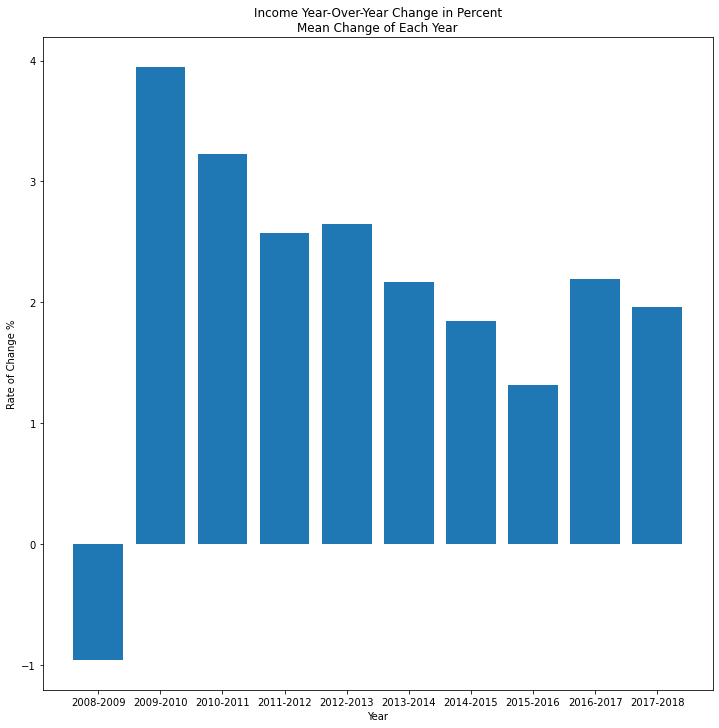

In [152]:
#let's visualize the income_yoy_means...
locations= list(range(1,11))
heights= income_yoy_mean
labels= each_period
plt.subplots(figsize=(12,12))
plt.bar(each_period,heights)
plt.title('Income Year-Over-Year Change in Percent\nMean Change of Each Year')
plt.xlabel('Year')
plt.ylabel('Rate of Change %');

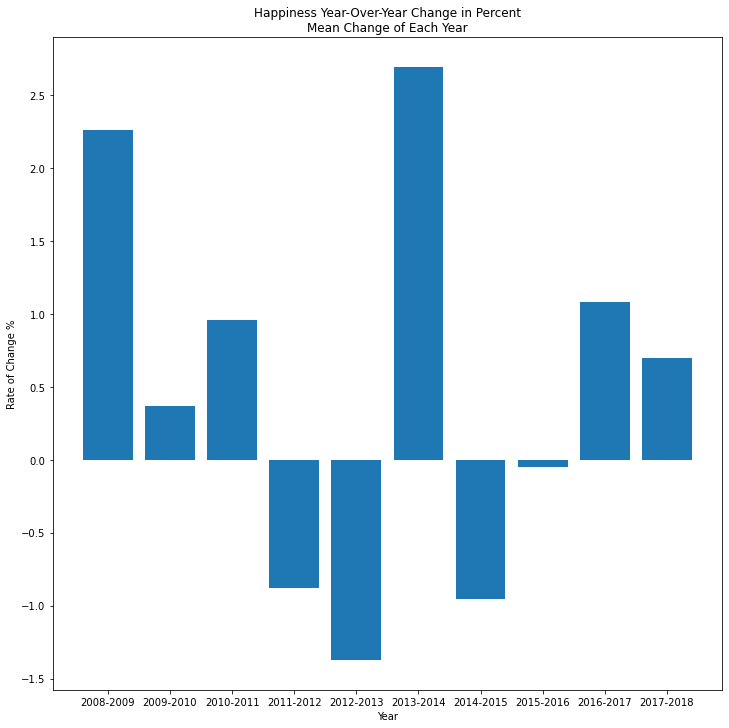

In [153]:
#Now, let's visualize the happiness_yoy_mean...
plt.subplots(figsize=(12,12))
plt.bar(each_period,happiness_yoy_mean)
plt.title('Happiness Year-Over-Year Change in Percent\nMean Change of Each Year')
plt.xlabel('Year')
plt.ylabel('Rate of Change %');

>**The difference between how the means in each series is obvious from the two bar graphs that we created.**

In [155]:
#let's put them together in one horizontal bar chart so that we can see better...

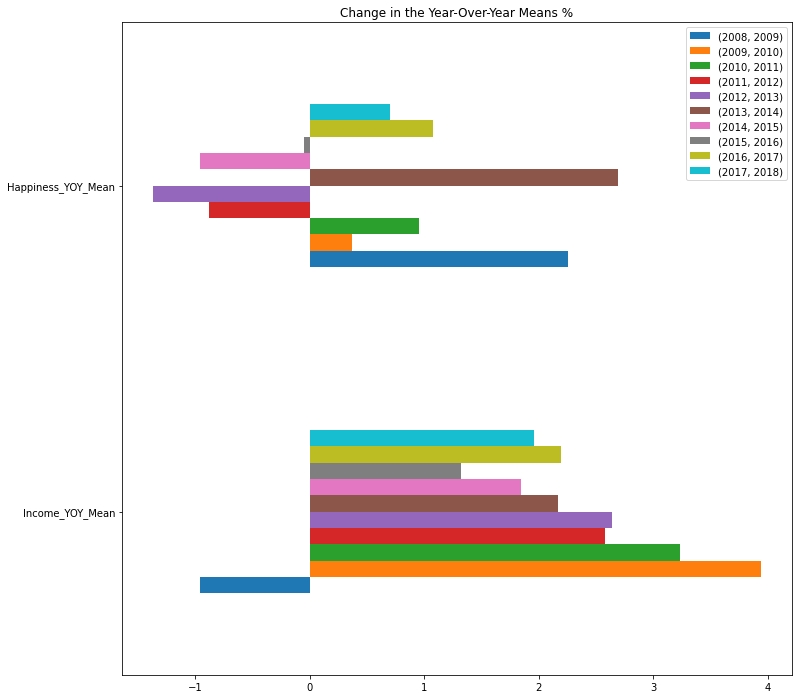

In [156]:
df_yoy_means.plot(kind='barh',title='Change in the Year-Over-Year Means %',figsize=(12,12));

<div class="alert alert-block alert-success">
<b>From the charts above, we can see that although the mean of yoy income growth in many years is increasing, we can't see a correlated trend with the yoy mean of the happiness score..</b>
</div>

In [158]:
#Now, let's explore the scatter plot of the whole YOY data we have...

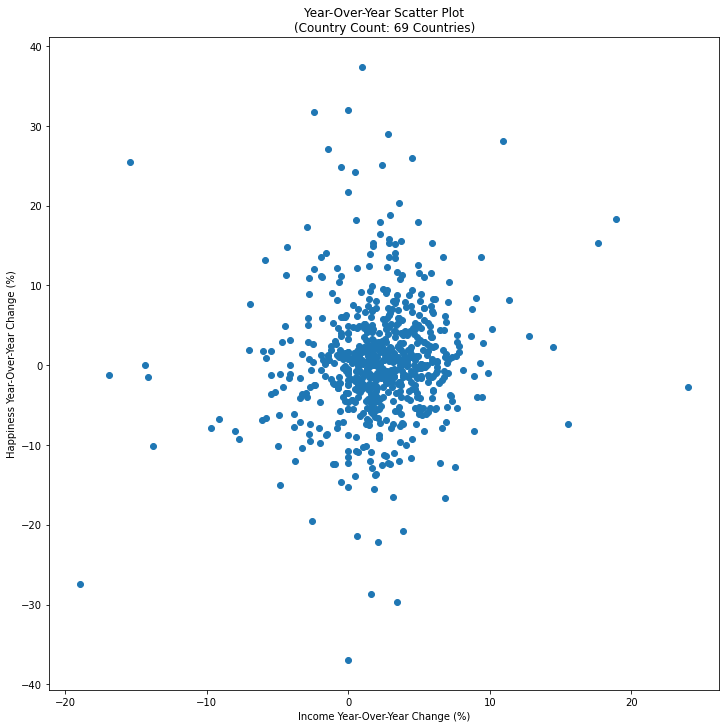

In [159]:
plt.subplots(figsize=(12,12))
plt.scatter(x=yoy_income,y=yoy_happiness)
plt.title('Year-Over-Year Scatter Plot\n(Country Count: 69 Countries)')
plt.xlabel('Income Year-Over-Year Change (%)')
plt.ylabel('Happiness Year-Over-Year Change (%)');

<div class="alert alert-block alert-success">
<b>From the scatter plot above, we cannot see neither a strong positive or negative correlation even when we are plotting all the YOY data we have...</b>
</div>

In [ ]:
#let's explore the distribution of each year of our main dataframes (df_income, df_happiness)...

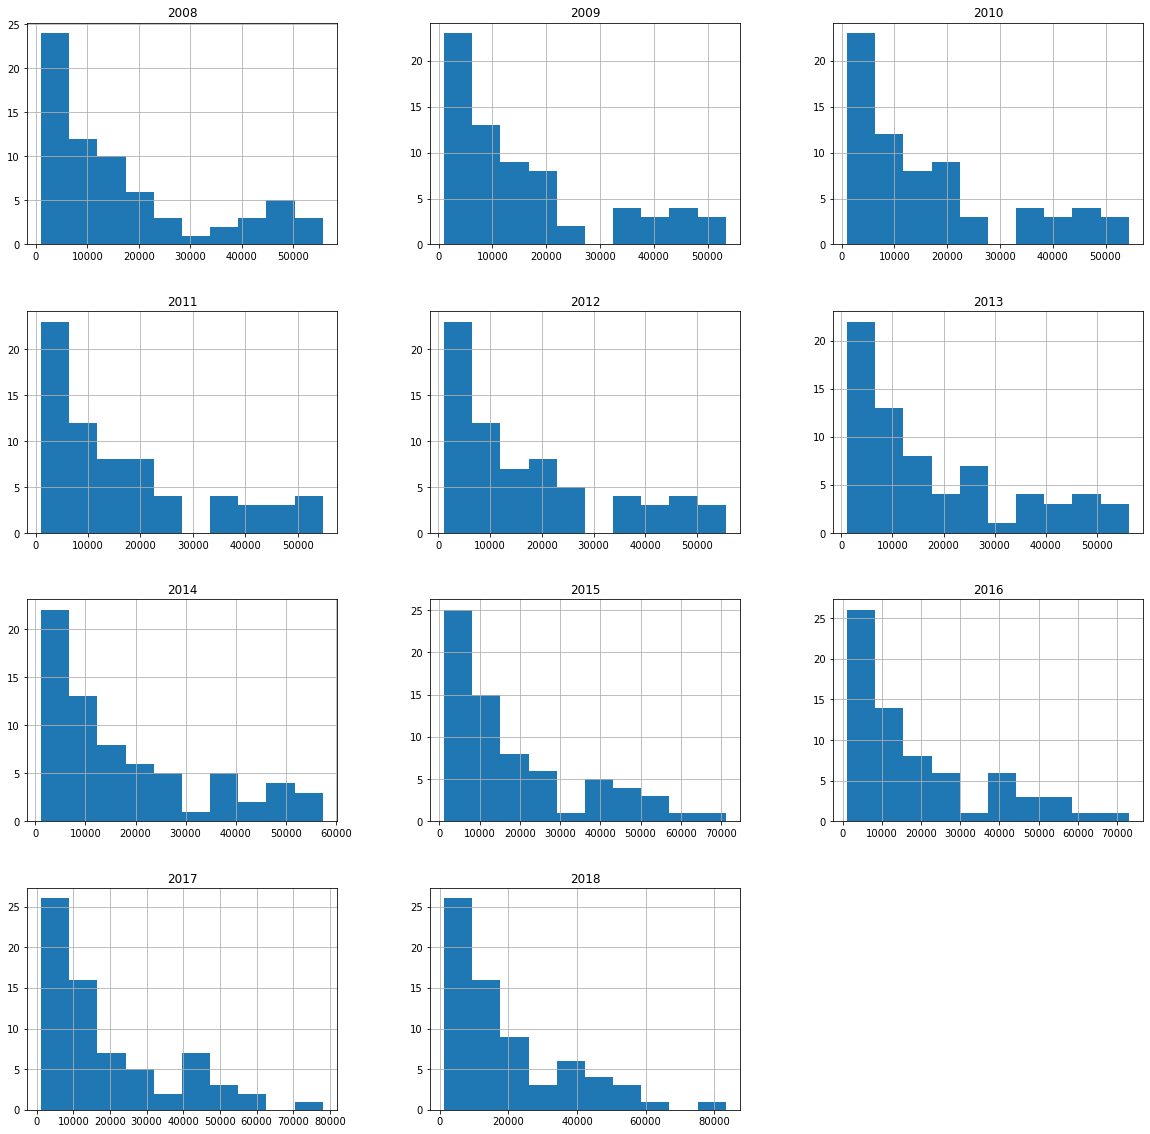

In [162]:
#first, df_income...
df_income.hist(figsize=(20,20));

In [165]:
#we can see that the distribution of the df_income is more skewed to the right in general...

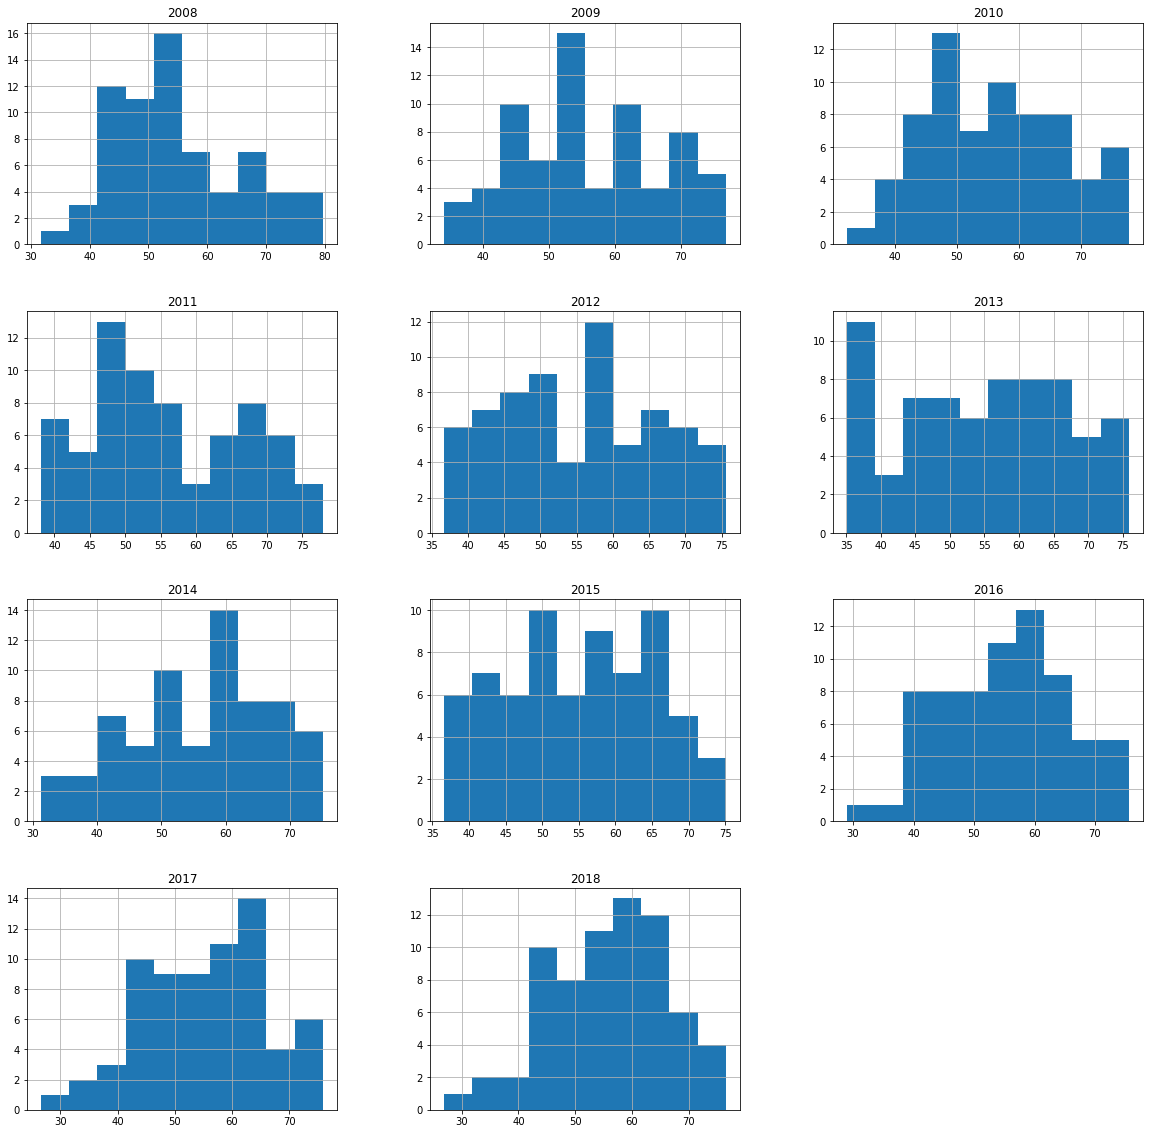

In [166]:
#second,df_happiness...
df_happiness.hist(figsize=(20,20));

In [167]:
#the first thing to notice that the distribution of df_happiness is NOT as skewed as df_income.
#also, the distribution of df_happiness is different from one year to another. 
#bimodality can also be noticed in some years...

In [ ]:
#let's use box plots to help us understand more...

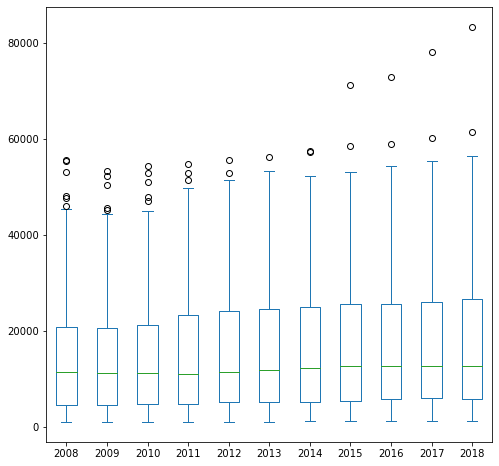

In [329]:
df_income.plot(kind='box',figsize=(8,8));

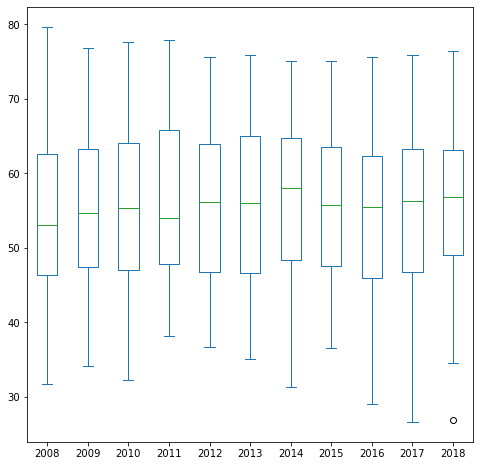

In [330]:
df_happiness.plot(kind='box',figsize=(8,8));

In [ ]:
#from the two box plots above, the right skeweness of the df_income data is more clear.
#also, df_income has more outliers compared to df_happiness
#we need to remember that outliers affect the measure of mean, so we might need to use the median as a better measure of center

>**Let's act upon our findings...**

In [324]:
#let's find the above-median and below-median groups in the df_income dataframe...
#This will require grouping the happiness table based on the findings of the income table then we can compare..

<div class="alert alert-block alert-info">
    <b>What to do now?</b><br>
    
- let's find the difference between the last year (2018) and the first year (2008) in the df_income dataframe<br>
- then, we will get this difference in percent<br>
- later, we will group the countries in the df_income based on that overall difference (whether above or below the median value of the overall difference in percent)
</div>

In [ ]:
#let's find the overall difference between 2018 and 2008 (percent)...

In [174]:
#creating a new column and adding the result to it...
df_income['Percent of Overall Difference']= ((df_income['2018']/df_income['2008'])*100)-100

In [175]:
#let's check...
df_income

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Percent of Overall Difference
country,,,,,,,,,,,,
Afghanistan,1480.0,1760.0,1960.0,1910.0,2080.0,2120.0,2100.0,2070.0,2060.0,2060.0,2030.0,37.162162
Argentina,23100.0,21500.0,23500.0,24600.0,24100.0,24400.0,23600.0,23900.0,23200.0,23600.0,22800.0,-1.298701
Armenia,10500.0,9050.0,9290.0,9730.0,10400.0,10700.0,11000.0,11300.0,11300.0,12100.0,12700.0,20.952381
Azerbaijan,12900.0,13800.0,14300.0,13900.0,14000.0,14700.0,14900.0,14900.0,14200.0,14100.0,14200.0,10.077519
Bangladesh,2660.0,2760.0,2880.0,3040.0,3200.0,3350.0,3510.0,3700.0,3920.0,4160.0,4440.0,66.917293
...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,4190.0,4450.0,4650.0,4880.0,5160.0,5470.0,5760.0,6090.0,6350.0,6520.0,6760.0,61.336516
Venezuela,20700.0,19800.0,19700.0,20400.0,21300.0,24600.0,23400.0,21600.0,17500.0,14800.0,12300.0,-40.579710
Vietnam,4630.0,4830.0,5090.0,5350.0,5570.0,5820.0,6100.0,6440.0,6770.0,7160.0,7590.0,63.930886


In [179]:
#let's do the same with df_happiness...

In [180]:
df_happiness['Percent of Overall Difference']= ((df_happiness['2018']/df_happiness['2008'])*100)-100

In [182]:
df_happiness

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Percent of Overall Difference
country,,,,,,,,,,,,
Afghanistan,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,-27.688172
Argentina,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,-2.852349
Armenia,46.5,41.8,43.7,42.6,43.2,42.8,44.5,43.5,43.3,42.9,50.6,8.817204
Azerbaijan,48.2,45.7,42.2,46.8,49.1,54.8,52.5,51.5,53.0,51.5,51.7,7.261411
Bangladesh,50.5,50.8,48.6,49.9,47.2,46.6,46.4,46.3,45.6,43.1,45.0,-10.891089
...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,53.1,52.6,51.0,57.4,60.2,59.4,60.5,59.7,58.9,64.2,62.1,16.949153
Venezuela,62.6,71.9,74.8,65.8,70.7,65.5,61.4,55.7,40.4,50.7,50.1,-19.968051
Vietnam,54.8,53.0,53.0,57.7,55.3,50.2,50.8,50.8,50.6,51.8,53.0,-3.284672


In [ ]:
#let's round the results...

In [183]:
df_income= df_income.round(1)

In [185]:
df_income

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Percent of Overall Difference
country,,,,,,,,,,,,
Afghanistan,1480.0,1760.0,1960.0,1910.0,2080.0,2120.0,2100.0,2070.0,2060.0,2060.0,2030.0,37.2
Argentina,23100.0,21500.0,23500.0,24600.0,24100.0,24400.0,23600.0,23900.0,23200.0,23600.0,22800.0,-1.3
Armenia,10500.0,9050.0,9290.0,9730.0,10400.0,10700.0,11000.0,11300.0,11300.0,12100.0,12700.0,21.0
Azerbaijan,12900.0,13800.0,14300.0,13900.0,14000.0,14700.0,14900.0,14900.0,14200.0,14100.0,14200.0,10.1
Bangladesh,2660.0,2760.0,2880.0,3040.0,3200.0,3350.0,3510.0,3700.0,3920.0,4160.0,4440.0,66.9
...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,4190.0,4450.0,4650.0,4880.0,5160.0,5470.0,5760.0,6090.0,6350.0,6520.0,6760.0,61.3
Venezuela,20700.0,19800.0,19700.0,20400.0,21300.0,24600.0,23400.0,21600.0,17500.0,14800.0,12300.0,-40.6
Vietnam,4630.0,4830.0,5090.0,5350.0,5570.0,5820.0,6100.0,6440.0,6770.0,7160.0,7590.0,63.9


In [186]:
df_happiness= df_happiness.round(1)

In [188]:
df_happiness

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Percent of Overall Difference
country,,,,,,,,,,,,
Afghanistan,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,-27.7
Argentina,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,-2.9
Armenia,46.5,41.8,43.7,42.6,43.2,42.8,44.5,43.5,43.3,42.9,50.6,8.8
Azerbaijan,48.2,45.7,42.2,46.8,49.1,54.8,52.5,51.5,53.0,51.5,51.7,7.3
Bangladesh,50.5,50.8,48.6,49.9,47.2,46.6,46.4,46.3,45.6,43.1,45.0,-10.9
...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,53.1,52.6,51.0,57.4,60.2,59.4,60.5,59.7,58.9,64.2,62.1,16.9
Venezuela,62.6,71.9,74.8,65.8,70.7,65.5,61.4,55.7,40.4,50.7,50.1,-20.0
Vietnam,54.8,53.0,53.0,57.7,55.3,50.2,50.8,50.8,50.6,51.8,53.0,-3.3


In [ ]:
#Now, let's rename the column of the overall difference so that it will include the name of the dataframe as well
#This will make things more understandable when we plot and compare the findings...

In [198]:
df_happiness.rename({'Percent of Overall Difference':'2018/2008_happiness_diff_percent'},axis=1,inplace=True)

In [199]:
df_income.rename({'Percent of Overall Difference':'2018/2008_income_diff_percent'},axis=1,inplace=True)

In [200]:
#let's save the changes...

In [201]:
df_income.to_csv('income_table_with_overall_diff',index=False)
df_happiness.to_csv('happiness_table_with_overall_diff',index=False)
print('Done!')

Done!


In [204]:
df_happiness

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2018/2008_happiness_diff_percent
country,,,,,,,,,,,,
Afghanistan,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,-27.7
Argentina,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,-2.9
Armenia,46.5,41.8,43.7,42.6,43.2,42.8,44.5,43.5,43.3,42.9,50.6,8.8
Azerbaijan,48.2,45.7,42.2,46.8,49.1,54.8,52.5,51.5,53.0,51.5,51.7,7.3
Bangladesh,50.5,50.8,48.6,49.9,47.2,46.6,46.4,46.3,45.6,43.1,45.0,-10.9
...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,53.1,52.6,51.0,57.4,60.2,59.4,60.5,59.7,58.9,64.2,62.1,16.9
Venezuela,62.6,71.9,74.8,65.8,70.7,65.5,61.4,55.7,40.4,50.7,50.1,-20.0
Vietnam,54.8,53.0,53.0,57.7,55.3,50.2,50.8,50.8,50.6,51.8,53.0,-3.3


In [207]:
#let's divide the countries in df_income to two groups based on the median of the last column as we mentioned before..

In [208]:
lower_income_growth= df_income['2018/2008_income_diff_percent'][df_income['2018/2008_income_diff_percent'] < df_income['2018/2008_income_diff_percent'].median()]

In [209]:
higher_income_growth= df_income['2018/2008_income_diff_percent'][df_income['2018/2008_income_diff_percent'] >= df_income['2018/2008_income_diff_percent'].median()]

In [212]:
slower_growth_countries= lower_income_growth.index

In [213]:
faster_growth_countries= higher_income_growth.index

In [214]:
#Now, we have grouped the countries based on the median of the overall change in their overall economic growth...
#Next, we will get the happiness score of these two groups from the df_happiness

In [215]:
slower_growth_happiness=  df_happiness.loc[slower_growth_countries,'2018/2008_happiness_diff_percent']

In [219]:
faster_growth_happiness= df_happiness.loc[faster_growth_countries,'2018/2008_happiness_diff_percent']

<div class="alert alert-block alert-info">
Now, let's create two dataframes:<br>
    
- one of them includes each country in the slower overall economic growth with their economic growth rate and their overall happiness rate<br>
- the second will include each country in the faster overall economic growth with (income growth and happiness score difference)
</div>

In [222]:
df_compare_slower= pd.DataFrame(data=[lower_income_growth,slower_growth_happiness])

Important note:
The overall income difference between 2018 and 2008 doesn't mean that countries in the "slower growth rate" are doing worse than countries in the "faster growth rate" because as we can see many rich countries already exist in this group, the opposite is also true.

In [224]:
df_compare_slower

country,Argentina,Azerbaijan,Belarus,Brazil,Canada,Cameroon,Germany,Denmark,Ecuador,Egypt,...,Russia,Saudi Arabia,El Salvador,Sweden,Chad,Uganda,Ukraine,United States,Venezuela,South Africa
2018/2008_income_diff_percent,-1.3,10.1,18.9,3.5,6.1,16.5,12.4,6.2,12.6,16.8,...,6.8,5.1,16.6,9.1,0.6,20.5,-6.8,11.2,-40.6,0.0
2018/2008_happiness_diff_percent,-2.9,7.3,-4.2,-7.5,-4.1,22.4,9.2,-4.0,15.7,-13.4,...,-2.0,-6.6,21.0,-2.0,-3.0,-5.5,-9.9,-5.5,-20.0,-8.8


In [227]:
df_compare_faster= pd.DataFrame(data=[higher_income_growth,faster_growth_happiness])

In [228]:
df_compare_faster

country,Afghanistan,Armenia,Bangladesh,Bolivia,Chile,China,Colombia,Costa Rica,Dominican Republic,Georgia,...,Philippines,Palestine,Senegal,Thailand,Turkey,Tanzania,Uruguay,Uzbekistan,Vietnam,Zimbabwe
2018/2008_income_diff_percent,37.2,21.0,66.9,36.4,20.6,105.1,26.3,24.1,47.5,52.8,...,51.6,27.2,21.2,33.1,42.0,36.3,35.8,61.3,63.9,79.9
2018/2008_happiness_diff_percent,-27.7,8.8,-10.9,11.7,11.2,5.8,-3.1,4.2,12.2,12.0,...,27.9,3.6,1.9,6.6,1.4,-21.2,12.5,16.9,-3.3,14.2


In [230]:
df_compare_slower= df_compare_slower.transpose()

In [231]:
df_compare_faster= df_compare_faster.transpose()

In [232]:
df_compare_slower.to_csv('slower_corr_table')

In [234]:
#let's check them...
df_compare_slower.head()

,2018/2008_income_diff_percent,2018/2008_happiness_diff_percent
country,,
Argentina,-1.3,-2.9
Azerbaijan,10.1,7.3
Belarus,18.9,-4.2
Brazil,3.5,-7.5
Canada,6.1,-4.1


In [235]:
df_compare_faster.head()

,2018/2008_income_diff_percent,2018/2008_happiness_diff_percent
country,,
Afghanistan,37.2,-27.7
Armenia,21.0,8.8
Bangladesh,66.9,-10.9
Bolivia,36.4,11.7
Chile,20.6,11.2


In [236]:
#Great! That looks better. Let's save our work...
df_compare_slower.to_csv('transposed_slower_growth',index=False)
df_compare_faster.to_csv('transposed_faster_growth',index=False)
print('Done!')

Done!


In [238]:
#let's check correlation between income rate and happiness rate in our two groups of countries...

In [239]:
df_compare_slower.corr() #We can see a weak positive correlation between income change and happiness score

,2018/2008_income_diff_percent,2018/2008_happiness_diff_percent
2018/2008_income_diff_percent,1.000000,0.487111
2018/2008_happiness_diff_percent,0.487111,1.000000


In [237]:
df_compare_faster.corr() #We can see a negligible correlation between income change and happiness score

,2018/2008_income_diff_percent,2018/2008_happiness_diff_percent
2018/2008_income_diff_percent,1.000000,-0.175256
2018/2008_happiness_diff_percent,-0.175256,1.000000


<div class="alert alert-block alert-success">
<b>From checking the correlation tables above, we can see that:<br>
    
    
1) There is a weak positive correlation between income increase/decrease and happiness score in the slower income growth group.<br>
2) There is a negligible negative correlation in the faster income growth group (Almost no correlation).</b>
</div>

In [240]:
#let's visualize these findings...

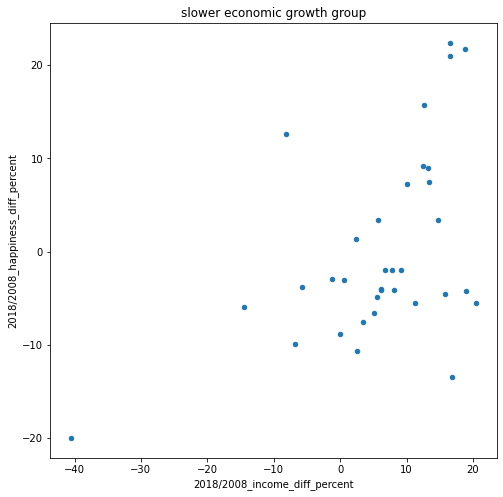

In [248]:
df_compare_slower.plot(kind='scatter',x='2018/2008_income_diff_percent',y='2018/2008_happiness_diff_percent',title= 'slower economic growth group',figsize=(8,8));

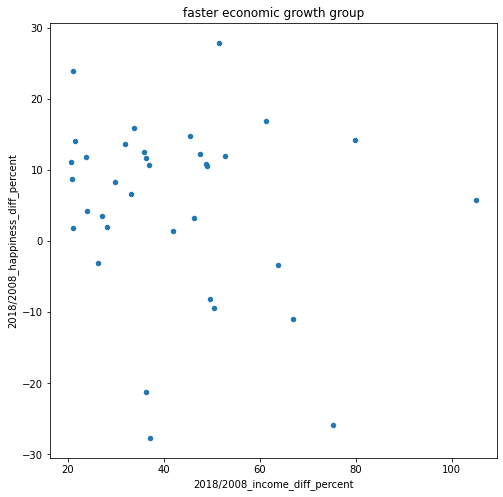

In [247]:
df_compare_faster.plot(kind='scatter',x='2018/2008_income_diff_percent',y='2018/2008_happiness_diff_percent',title='faster economic growth group',figsize=(8,8));

In [249]:
#let's also plot both variables for each group to help us comprehend more...

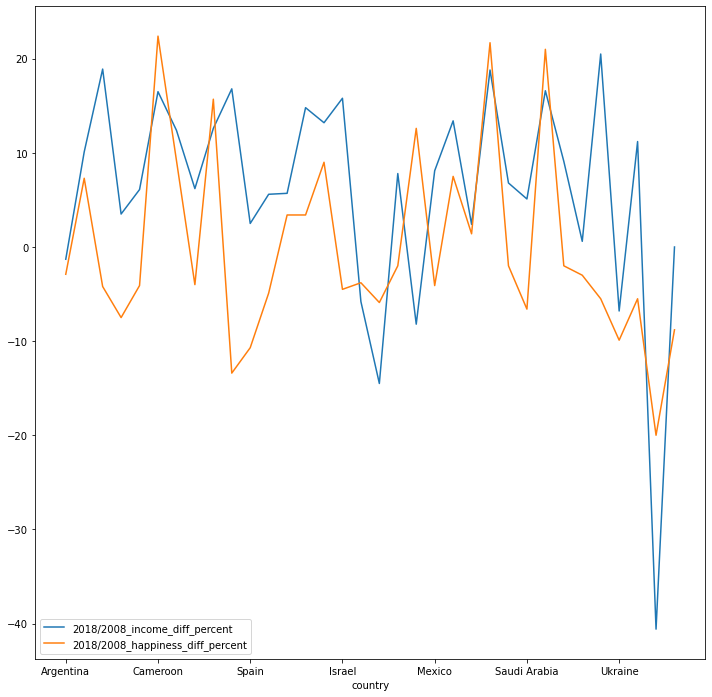

In [255]:
df_compare_slower.plot(figsize=(12,12));

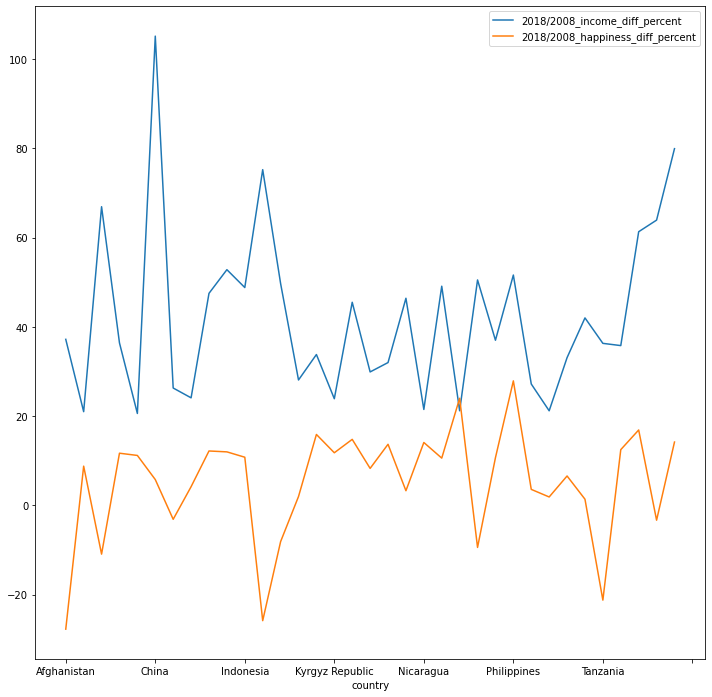

In [254]:
df_compare_faster.plot(figsize=(12,12));

<a id='conclusions'></a>
## Conclusions

<div class="alert alert-block alert-warning">
<b>Before sharing conclusions, it is very important to remember that correlation doesn't imply causation. We have applied descriptive statistics methods that can help us study correlation between different elements; however, more advanced inferential statistics methods and machine learning techniques are required to study any cause-and-effect relation.</b>
</div>

<div class="alert alert-block alert-info">
We had one main question when we started our data investigation. The question was:<br>
    

<i><b>"Is there a correlation between the level of income growth and the level of happiness?"</b></i>
    
<br>

In the light of the main question and sub-questions that we asked, we have taken the needed steps to generate and analyze the following:

1) The Year-Over-Year Change in both the Income Per Capita dataset and the Happiness Score dataset in the 10-year period (2008-2018)

   
2) The Overall Variation (in percent) between the base year(2008) and the last year(2018) in both the Income Per Capita dataset and the Happiness Score dataset.

3) The Correlation between the change in the level of economic growth and the change in the subjective happiness score in two sub-groups (slower economic growth / faster economic growth) based on the overall variation.</b>
</div>

<div class="alert alert-block alert-success">
    <b>Regarding the main question, the answer is:</b><br>


1) By studying the Year-Over-Year rates for both datasets, <b>no strong positive or negative correlation was found</b> between the increase/decrease of Income Per Capita and Subjective Happiness Score.<br>

2) A weak positive correlation of <b>0.487111</b> was found between these two elements in the countries with a smaller variance in their economic growth (below the median variance); meanwhile, no correlation was found in the countries with a bigger variance in their economic growth (above or equal the median variance)
</div>

<div class="alert alert-block alert-info">
Worth mentioning:

- Our cleaned datasets included 69 countries. 

Interesting observation:

- The list of countries with a smaller variance in their economic growth between the base year and the end year included many rich and developed countries; on the other hand, the list of countries with a bigger variance in their economic growth didn't include rich or developed countries. (This can be a starting point to a new research)
</div>


**Thank You!**